In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05 * np.random.rand(100)

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame()

In [5]:
df['X'] = X.reshape(100)
df['y'] = y

In [6]:
df

,X,y
0,-0.125460,0.048792
1,0.450714,0.641251
2,0.231994,0.177181
3,0.098658,0.054629
4,-0.343981,0.400348
...,...,...
95,-0.006204,0.017576
96,0.022733,0.037848
97,-0.072459,0.060606
98,-0.474581,0.720035


Text(0.5, 1.0, 'X vs y')

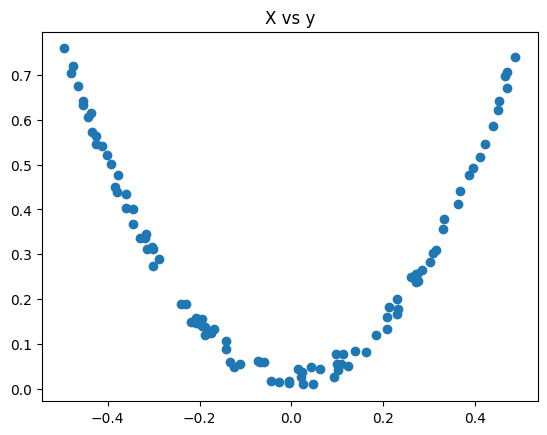

In [7]:
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [8]:
df['pred1'] = df['y'].mean()

In [9]:
df

,X,y,pred1
0,-0.125460,0.048792,0.290404
1,0.450714,0.641251,0.290404
2,0.231994,0.177181,0.290404
3,0.098658,0.054629,0.290404
4,-0.343981,0.400348,0.290404
...,...,...,...
95,-0.006204,0.017576,0.290404
96,0.022733,0.037848,0.290404
97,-0.072459,0.060606,0.290404
98,-0.474581,0.720035,0.290404


In [10]:
df['res1'] = df['y'] - df['pred1']

In [11]:
df

,X,y,pred1,res1
0,-0.125460,0.048792,0.290404,-0.241612
1,0.450714,0.641251,0.290404,0.350847
2,0.231994,0.177181,0.290404,-0.113223
3,0.098658,0.054629,0.290404,-0.235775
4,-0.343981,0.400348,0.290404,0.109944
...,...,...,...,...
95,-0.006204,0.017576,0.290404,-0.272828
96,0.022733,0.037848,0.290404,-0.252556
97,-0.072459,0.060606,0.290404,-0.229798
98,-0.474581,0.720035,0.290404,0.429631


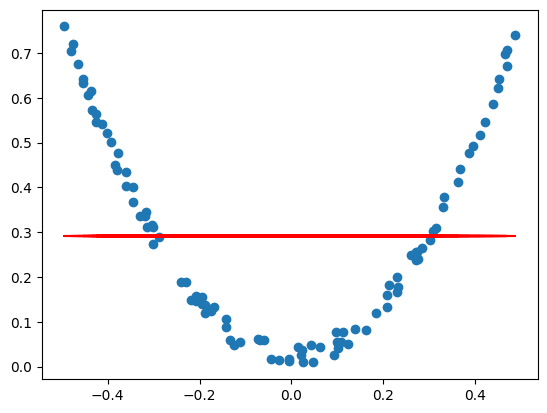

In [12]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
tree1 = DecisionTreeRegressor(max_leaf_nodes = 8)

In [15]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

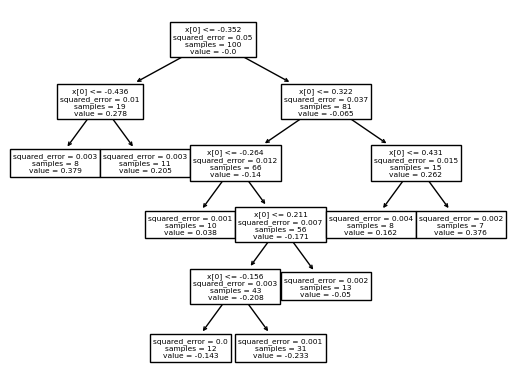

In [16]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [17]:
#generating X_test
X_test = np.linspace(-0.5, 0.5,500)

In [18]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500,1))

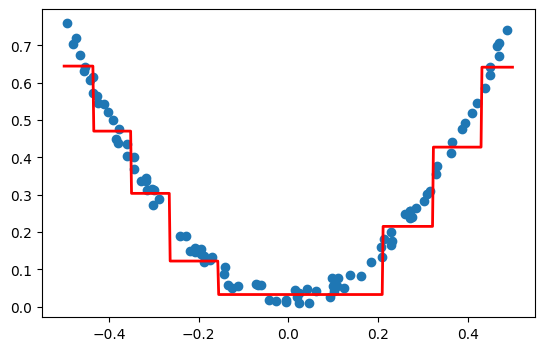

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth = 2, color = "red")
plt.scatter(df['X'],df['y'])

In [20]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [21]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.048792,0.290404,-0.241612,0.032563
1,0.450714,0.641251,0.290404,0.350847,0.641498
2,0.231994,0.177181,0.290404,-0.113223,0.215085
3,0.098658,0.054629,0.290404,-0.235775,0.032563
4,-0.343981,0.400348,0.290404,0.109944,0.303532
...,...,...,...,...,...
95,-0.006204,0.017576,0.290404,-0.272828,0.032563
96,0.022733,0.037848,0.290404,-0.252556,0.032563
97,-0.072459,0.060606,0.290404,-0.229798,0.032563
98,-0.474581,0.720035,0.290404,0.429631,0.644443


In [22]:
df['res2'] = df['y'] - df['pred2']

In [23]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.048792,0.290404,-0.241612,0.032563,0.016229
1,0.450714,0.641251,0.290404,0.350847,0.641498,-0.000247
2,0.231994,0.177181,0.290404,-0.113223,0.215085,-0.037903
3,0.098658,0.054629,0.290404,-0.235775,0.032563,0.022066
4,-0.343981,0.400348,0.290404,0.109944,0.303532,0.096816
...,...,...,...,...,...,...
95,-0.006204,0.017576,0.290404,-0.272828,0.032563,-0.014987
96,0.022733,0.037848,0.290404,-0.252556,0.032563,0.005286
97,-0.072459,0.060606,0.290404,-0.229798,0.032563,0.028044
98,-0.474581,0.720035,0.290404,0.429631,0.644443,0.075592


In [24]:
tree2 = DecisionTreeRegressor(max_leaf_nodes = 8)

In [25]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [26]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

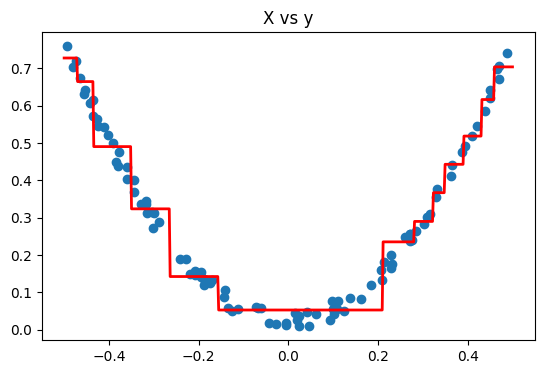

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [28]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


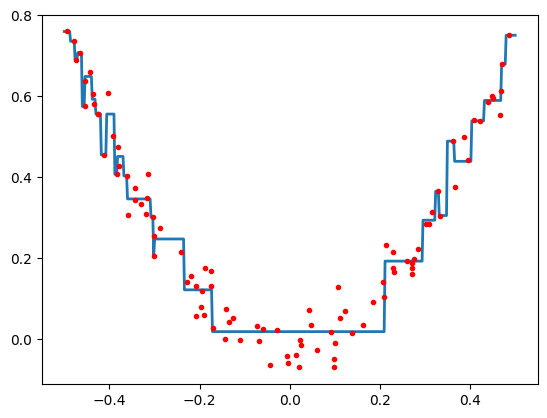

4


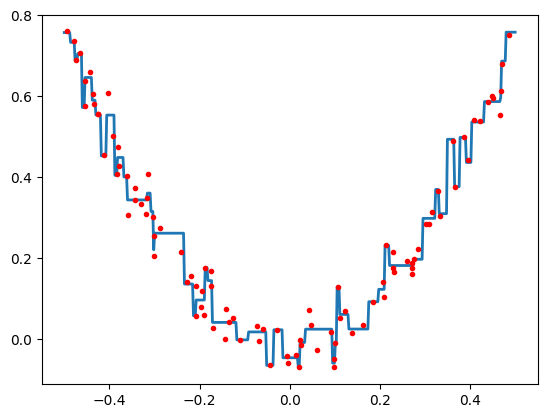

3


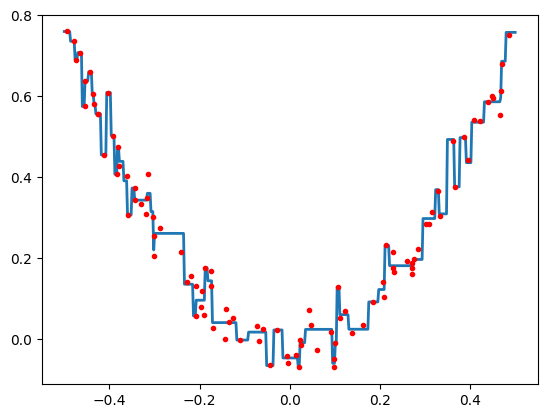

2


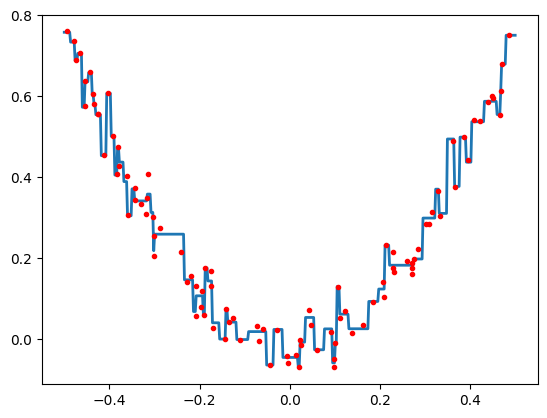

1


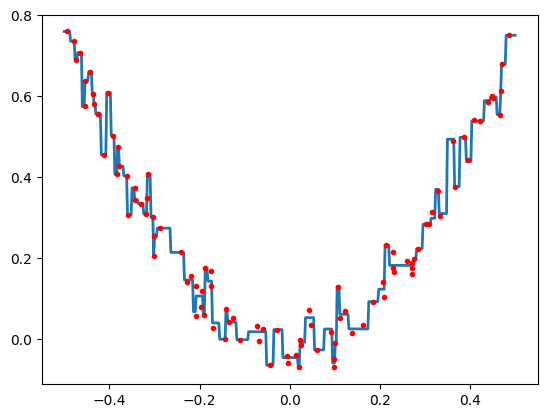

In [29]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)